
# <center> GLOBAL LIFE EXPECTANCY - A DATA STORY

<a href="https://www.tehrantimes.com/news/407556/Life-expectancy-increased-in-Iran-WHO">
  <img align="right" width="500" height="400" src="https://media.mehrnews.com/d/2016/10/22/4/2250060.jpg?ts=1486462047399">
  



    
    
    

>**Project Owner:** Swintabel Agyei<br>
>**Email:** swintabel95@gmail.com<br>
>[**Github Profile** ](https://github.com/Swintabel) | [**LinkedIn Profile**](https://www.linkedin.com/in/swintabelagyei/)|
**Data Source:** [Kaggle](https://www.kaggle.com/datasets/augustus0498/life-expectancy-who)<br>
> Presentation on Tableau    

## **INTRODUCTION**

### BACKGROUND
Life expectancy is a hypothetical measure of the average number of years a person is expected to live given some common factors affecting the individual at a particular year or time. The most common type of this measure is 'Life Expectancy at birth', the average number of years that a newborn could expect to live if he or she were to pass through life exposed to the sex- and age-specific death rates prevailing at the time of his or her birth, for a specific year, in a given country, territory, or geographic area. [[1]](#ref1)[[2]](#ref2) Generally, past studies suggest that developed countries tend to have a higher life expectancy compared to less developed countries.[[3]](#ref3) However, with the introduction of some immunization policies and evolving socio-economic factors over the years, it is important to find empirical evidence to answer questions on the country specific determining factors of life expectancy.
    
    

### OBJECTIVE
Living longer has been one of humanity’s greatest ambitions, and currently living more than 80 years is a realistic expectation in many countries. [[5]](#ref5) Several factors can lead to death, but good health policies are expected to be associated with higher life expectancy in any population. Health policies are perhaps not the only or most relevant driver of life expectancy but other factors such as; socio-economic status, lifestyle, unforseen disease outbreaks, amongst others may also influence a population's life expectancy on various levels.[[4]](#ref4) In 2019, life expectancy at birth reached 73.3 years globally but with a difference of around 16 years between high-income and low-income countries.[[6]](#ref6) Given the aforementioned background, this project seeks to investigate the following Questions;

* To what level does a country's economic status affect life expectancy of its population?
* Does lifestyle trends in a country affects life expectancy?
* Do Health policies have a strong impact on life expectancy?
* Does the prevalence of diseases have a strong effect on life expectancy?

### METHODOLOGY

**ABOUT DATA**

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors and socio-economic status for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. The data spans through 2000 to 2015.





## EXPLORATORY ANALYSIS
It is important to see the general overview the data provides in terms of the underlying objectives of the analysis and then probe further into the interesting trends.
    
**LOADING DATA**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn


In [2]:
led=pd.read_excel("led_clean.xlsx")
led.head(2)

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,55,0.01,71.279624,65.0,741,...,52.0,8.16,65.0,0.1,584.259210,18938762.0,15.4,15.7,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,55,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.4,15.7,0.476,10.0


#### LIFE EXPECTANCY AND ECONOMIC STATUS

In [3]:
led_group = led.groupby(by = ['Year', 'Status']).mean().reset_index()

In [4]:
led_group.head()

,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,2000,Developed,76.803125,91.718750,1.781250,9.930625,384.886793,79.057048,99.812500,45.581250,...,91.750000,6.971875,88.937500,0.100000,9419.450601,3.735217e+06,1.462500,1.440625,0.814679,14.888138
1,2000,Developing,64.696026,192.423841,17.940397,3.410000,111.200512,75.265625,331.536424,32.390222,...,78.986045,5.306278,77.819931,0.593377,2832.982891,5.064441e+06,5.715349,5.770861,0.516576,10.115611
2,2001,Developed,77.128125,90.281250,1.750000,9.861250,394.433169,80.302204,110.125000,48.950000,...,93.875000,6.770000,93.312500,0.100000,10179.815318,2.641105e+06,1.434375,1.412500,0.819846,15.004145
3,2001,Developing,65.062914,185.304636,17.675497,3.409238,125.838073,71.846260,319.847682,33.685742,...,79.356197,5.367232,79.156418,0.612583,2935.960981,6.026863e+06,5.518777,5.576159,0.550780,10.432018
4,2002,Developed,77.546875,86.468750,1.718750,10.018125,396.967725,84.742673,105.531250,52.315625,...,93.281250,7.037500,93.562500,0.100000,9310.876731,4.311566e+06,1.418750,1.393750,0.825106,15.182653


##### AVERAGE TREND

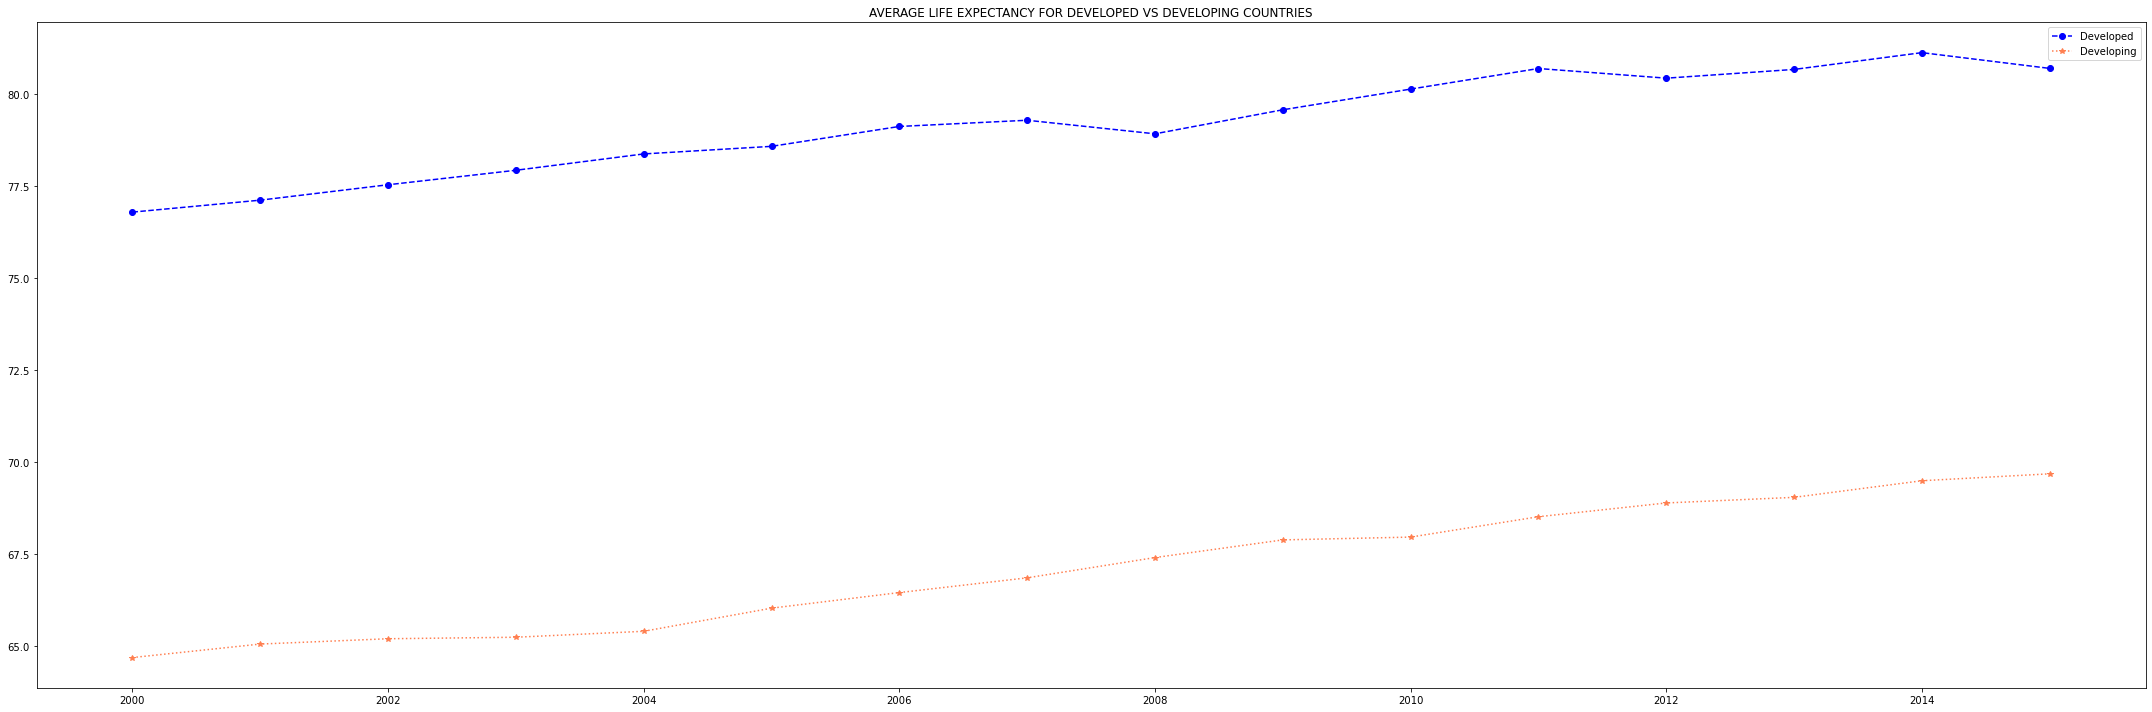

In [43]:
Developed = led_group.loc[led_group['Status'] == 'Developed',:]
Developing = led_group.loc[led_group['Status'] == 'Developing',:]
plt.figure(figsize=(30, 10))
plt.plot(Developed['Year'], Developed['Lifeexpectancy'], color='blue', linestyle='--', marker='o')
plt.plot(Developing['Year'], Developing['Lifeexpectancy'], color='coral', linestyle=':', marker='*')
plt.title('AVERAGE LIFE EXPECTANCY FOR DEVELOPED VS DEVELOPING COUNTRIES')
plt.legend(['Developed','Developing'])
plt.show()

##### CORRELATION WITH OTHER VARIABLES

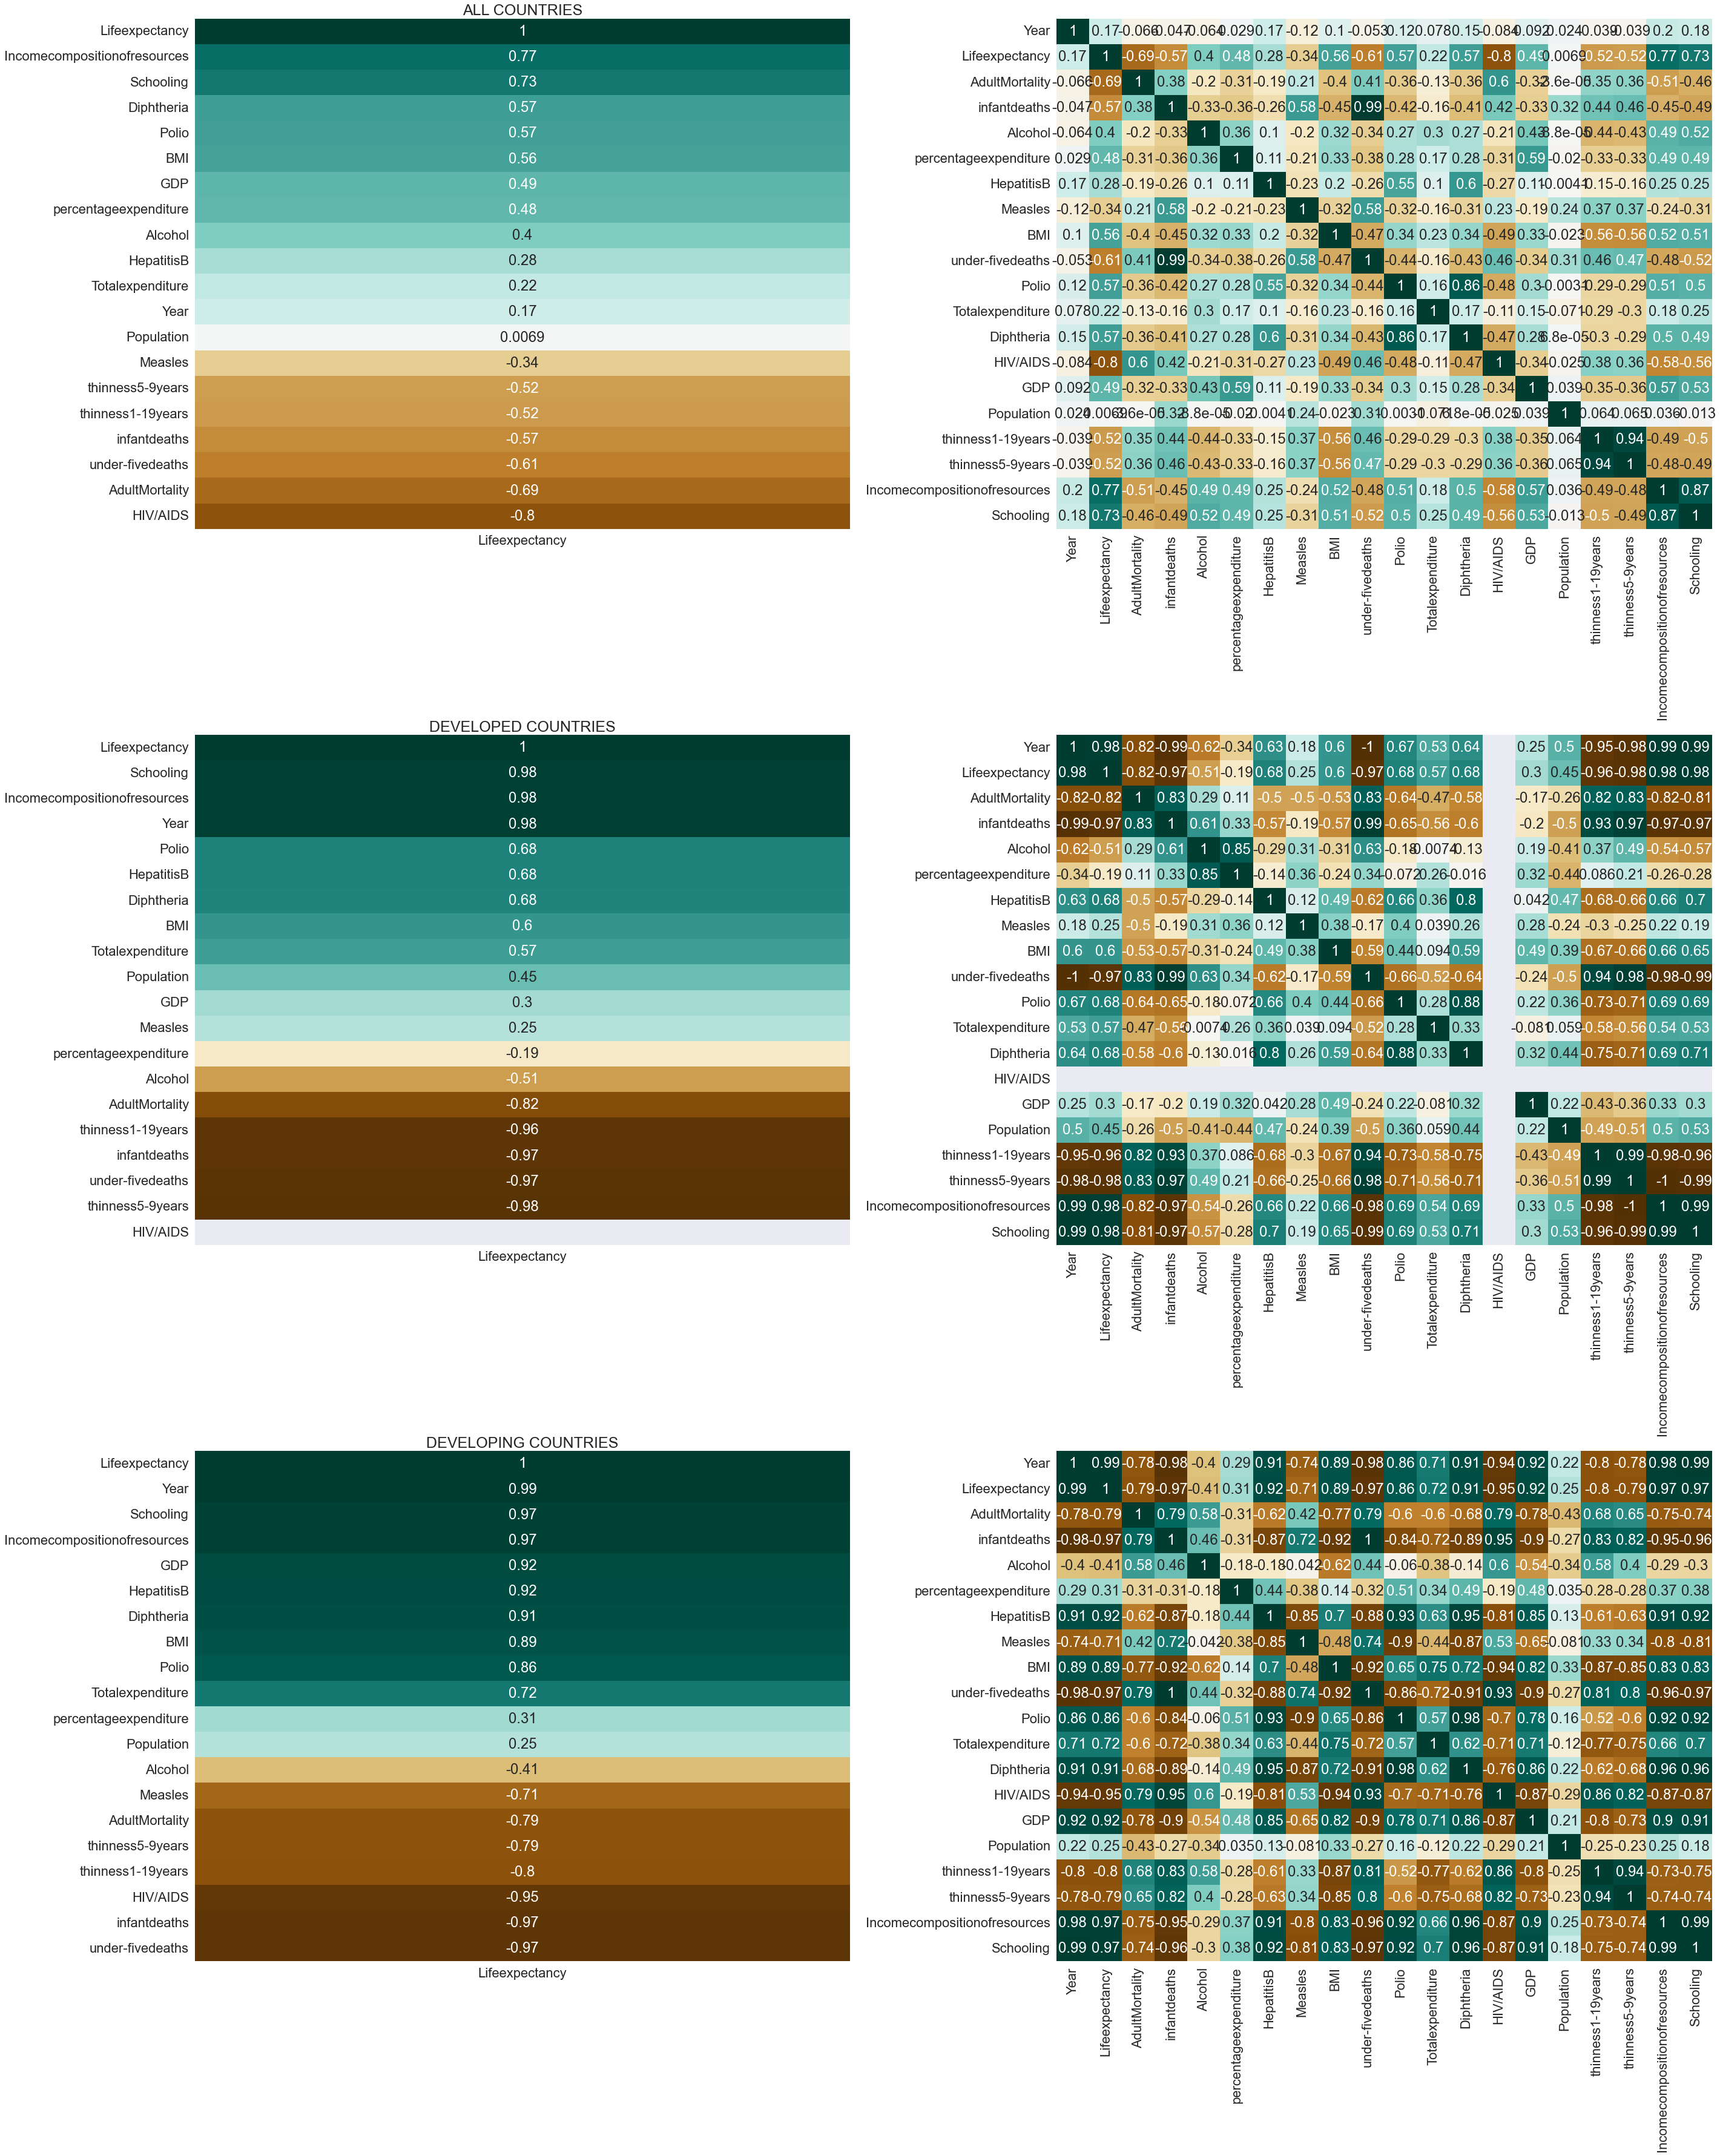

In [61]:
#fig, ax =plt.subplots(1,3,sharex=True, sharey=True)

plt.figure(figsize=(40,50))
sn.set(font_scale=2)
led_num = led._get_numeric_data()
corrMatrix1 = led_num.corr()
plt.subplot(3,2,1)
sn.heatmap(corrMatrix1[['Lifeexpectancy']].sort_values(by='Lifeexpectancy', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG',cbar=False)
plt.title("ALL COUNTRIES", fontsize = 25)

plt.subplot(3,2,2)
sn.heatmap(corrMatrix1, vmin=-1, vmax=1, annot=True, cmap='BrBG',cbar=False)


Developed_num = Developed._get_numeric_data()
corrMatrix2 = Developed_num.corr()
plt.subplot(3,2,3)
sn.heatmap(corrMatrix2[['Lifeexpectancy']].sort_values(by='Lifeexpectancy', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG',cbar=False)
plt.title("DEVELOPED COUNTRIES", fontsize = 25)
plt.subplot(3,2,4)
sn.heatmap(corrMatrix2, vmin=-1, vmax=1, annot=True, cmap='BrBG',cbar=False)


Developing_num = Developing._get_numeric_data()
corrMatrix3 = Developing_num.corr()
plt.subplot(3,2,5)
sn.heatmap(corrMatrix3[['Lifeexpectancy']].sort_values(by='Lifeexpectancy', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG',cbar=False)
plt.title("DEVELOPING COUNTRIES", fontsize = 25)
plt.subplot(3,2,6)
sn.heatmap(corrMatrix3, vmin=-1, vmax=1, annot=True, cmap='BrBG',cbar=False)

plt.show()

In [62]:

#%%html
#<div class='tableauPlaceholder' id='viz1654590640012' style='position: relative'><noscript><a href='#'><img alt='HAPPINESS IN THE WORLD ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;WO&#47;WORLDSHAPPINESS&#47;WORLDSHAPPINESS&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='WORLDSHAPPINESS&#47;WORLDSHAPPINESS' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;WO&#47;WORLDSHAPPINESS&#47;WORLDSHAPPINESS&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1654590640012');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1150px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1150px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='1577px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#https://www.analyticsvidhya.com/blog/2021/09/how-to-visualise-data-in-maps-using-geopandas/

#https://github.com/Kimonili/life-expectancy-dataset-EDA-modeling-Python/blob/master/Principles%20of%20Data%20Science%20Notebook.ipynb

#https://indianaiproduction.com/seaborn-heatmap/

`1`
[Bezy, Judith Marie. "life expectancy". Encyclopedia Britannica, 11 Nov. 2021, https://www.britannica.com/science/life-expectancy. Accessed 18 May 2022.]<a id='ref1'></a>

`2`[WHO. "Life expectancy at birth (years)". Indicator Metadata Registry List, https://www.who.int/data/gho/indicator-metadata-registry/imr-details/65. Accessed 18 May 2022.]<a id='ref2'></a>

`3`[Meyer, A.C., Drefahl, S., Ahlbom, A. et al. Trends in life expectancy: did the gap between the healthy and the ill widen or close?. BMC Med 18, 41 (2020). https://doi.org/10.1186/s12916-020-01514-z] <a id='ref3'></a>

`4`[Hao, L., Xu, X., Dupre, M.E. et al. Adequate access to healthcare and added life expectancy among older adults in China. BMC Geriatr 20, 129 (2020). https://doi.org/10.1186/s12877-020-01524-9] <a id='ref4'></a>

`5`[United Nations Department of Economic and Social Affairs. World population ageing 2019. New York: United Nations; 2020.] <a id='ref5'></a>

`6` [Wang H, Abbas KM, Abbasifard M, Abbasi-Kangevari M, Abbastabar H, Abd-Allah F, et al. Global age-sex-specific fertility,
mortality, healthy life expectancy (HALE), and population estimates in 204 countries and territories, 1950–2019: a comprehensive
demographic analysis for the Global Burden of Disease Study 2019.
Lancet. 2020;396(10258):1160–203.] <a id='ref6'></a>